<a href="https://colab.research.google.com/github/tendai-codes/DeepLearning/blob/main/convolutional_neural_network.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Convolutional Neural Network

### Importing the libraries

In [ ]:
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense, Dropout
import matplotlib.pyplot as plt
from keras.preprocessing import image
import numpy as np

/Users/tendaisibanda/Documents/Programming/Machine Learning/Machine Learning A-Z (Codes and Datasets)/Part 8 - Deep Learning/Section 40 - Convolutional Neural Networks (CNN)/Python/cnn_env/lib/python3.9/site-packages/urllib3/__init__.py:35: NotOpenSSLWarning: urllib3 v2 only supports OpenSSL 1.1.1+, currently the 'ssl' module is compiled with 'LibreSSL 2.8.3'. See: https://github.com/urllib3/urllib3/issues/3020
  warnings.warn(


In [ ]:
tf.__version__

'2.19.0'

## Part 1 - Data Preprocessing

### Preprocessing the Training set

In [ ]:
train_datagen = ImageDataGenerator(rescale = 1./255,
                                   shear_range = 0.2,
                                   zoom_range = 0.2,
                                   horizontal_flip = True)
training_set = train_datagen.flow_from_directory('dataset/training_set',
                                                 target_size = (64, 64),
                                                 batch_size = 32,
                                                 class_mode = 'binary')

Found 8001 images belonging to 2 classes.


### Preprocessing the Test set

In [ ]:
test_datagen = ImageDataGenerator(rescale = 1./255)
test_set = test_datagen.flow_from_directory('dataset/test_set',
                                            target_size = (64, 64),
                                            batch_size = 32,
                                            class_mode = 'binary')

Found 2000 images belonging to 2 classes.


In [ ]:
# Check Dataset

train_generator = train_datagen.flow_from_directory(
    'dataset/training_set',
    target_size=(64, 64),
    batch_size=9,          # Show 9 images
    class_mode='binary',
    shuffle=True
)

Found 8001 images belonging to 2 classes.


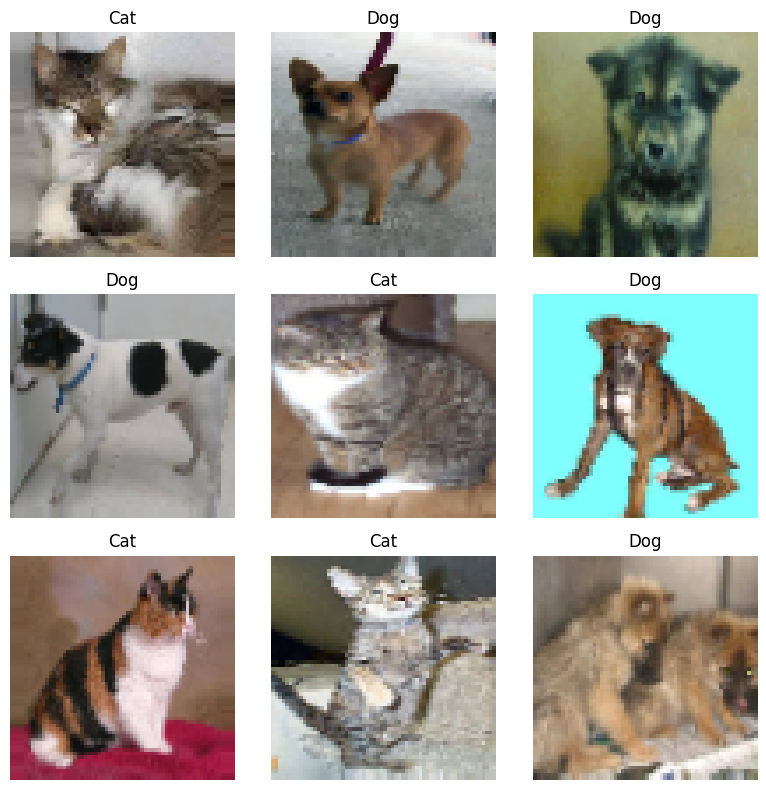

In [ ]:
images, labels = next(train_generator)  # Get a batch

plt.figure(figsize=(8, 8))
for i in range(9):
    plt.subplot(3, 3, i + 1)
    plt.imshow(images[i])
    label = 'Dog' if labels[i] == 1 else 'Cat'
    plt.title(label)
    plt.axis('off')
plt.tight_layout()
plt.show()

## Part 2 - Building the CNN

### Initialising the CNN

In [ ]:
cnn = tf.keras.models.Sequential()

### Step 1 - Convolution

In [ ]:
cnn.add(tf.keras.Input(shape=(64, 64, 3)))
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))

### Step 2 - Pooling

In [ ]:
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Adding a second convolutional layer

In [ ]:
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

### Step 3 - Flattening

In [ ]:
cnn.add(tf.keras.layers.Flatten())

### Step 4 - Full Connection

In [ ]:
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

### Step 5 - Output Layer

In [ ]:
cnn.add(tf.keras.layers.Dense(units=1, activation='sigmoid'))

## Part 3 - Training the CNN

### Compiling the CNN

In [ ]:
cnn.compile(optimizer = 'adam', loss = 'binary_crossentropy', metrics = ['accuracy'])

### Training the CNN on the Training set and evaluating it on the Test set

In [ ]:
cnn.fit(
    training_set,
    validation_data=test_set,
    epochs=25,
    verbose=1
)

Epoch 1/25


/Users/tendaisibanda/Documents/Programming/Machine Learning/Machine Learning A-Z (Codes and Datasets)/Part 8 - Deep Learning/Section 40 - Convolutional Neural Networks (CNN)/Python/cnn_env/lib/python3.9/site-packages/keras/src/trainers/data_adapters/py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.5488 - loss: 0.6892 - val_accuracy: 0.6220 - val_loss: 0.6450
Epoch 2/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.6710 - loss: 0.6045 - val_accuracy: 0.6900 - val_loss: 0.5805
Epoch 3/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 38ms/step - accuracy: 0.7266 - loss: 0.5510 - val_accuracy: 0.7015 - val_loss: 0.5748
Epoch 4/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 10s 38ms/step - accuracy: 0.7355 - loss: 0.5369 - val_accuracy: 0.7650 - val_loss: 0.4979
Epoch 5/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.7605 - loss: 0.4879 - val_accuracy: 0.7630 - val_loss: 0.4931
Epoch 6/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7715 - loss: 0.4775 - val_accuracy: 0.7660 - val_loss: 0.4927
Epoch 7/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 8s 33ms/step - accuracy: 0.7816 - loss: 0.4572 - val_accuracy: 0.7755 - val_loss: 0.4705
Epoch 8/25
251/251 ━━━━━━━━━━━━━━━━━━━━ 9s 34ms/step - accuracy: 0.7936 - loss: 0.4360 - val_accuracy: 0.

## Part 4 - Making a single prediction

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 23ms/step
Prediction: cat


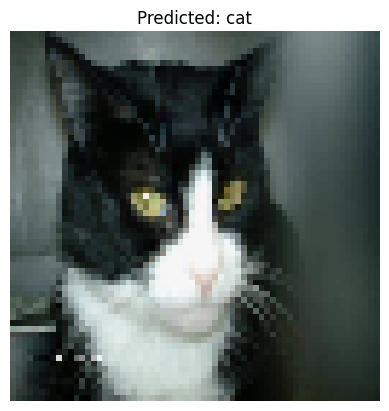

In [ ]:
# Load and preprocess the image
img_path = 'dataset/single_prediction/cat_or_dog_1.jpg'
test_image = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(test_image)
test_image_input = np.expand_dims(img_array, axis=0)

# Predict
result = cnn.predict(test_image_input)

# Determine label
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

# Print prediction
print(f'Prediction: {prediction}')

# Show the image
plt.imshow(img_array.astype('uint8') / 255.0)
plt.title(f'Predicted: {prediction}')
plt.axis('off')
plt.show()

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 10ms/step
Prediction: dog


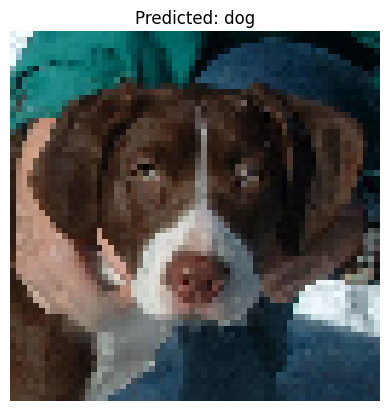

In [ ]:
# Load and preprocess the image
img_path = 'dataset/single_prediction/cat_or_dog_2.jpg'
test_image = image.load_img(img_path, target_size=(64, 64))
img_array = image.img_to_array(test_image)
test_image_input = np.expand_dims(img_array, axis=0)

# Predict
result = cnn.predict(test_image_input)

# Determine label
if result[0][0] == 1:
    prediction = 'dog'
else:
    prediction = 'cat'

# Print prediction
print(f'Prediction: {prediction}')

# Show the image
plt.imshow(img_array.astype('uint8') / 255.0)
plt.title(f'Predicted: {prediction}')
plt.axis('off')
plt.show()

In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_1.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 12ms/step


In [ ]:
print(prediction)

cat


In [ ]:
import numpy as np
from keras.preprocessing import image
test_image = image.load_img('dataset/single_prediction/cat_or_dog_2.jpg', target_size = (64, 64))
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis = 0)
result = cnn.predict(test_image)
training_set.class_indices
if result[0][0] == 1:
  prediction = 'dog'
else:
  prediction = 'cat'


1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 11ms/step


In [ ]:
print(prediction)

dog
